# Principal Component Analysis (PCA)

In [1]:
from numpy import *
from pylab import *

In [2]:
def pca(X,reduced_dimension=None):

    # Principal component Analysis
    # Input 
    # X: Matrix of training data contained in rows
    # reduced_dimension: Reduce dimension cardinality
    # output: Transformation matrix  

    samples,dim = X.shape    
    
    # zero mean unit variance normalization  
    X = (X-X.mean(axis = 0))/(X.var(axis=0))**(1/2.0)  
    
    # singular value decompostion
    U,S,V = linalg.svd(X)       

    # eigenvectors of X.T X
    if reduced_dimension:
        V = V[:reduced_dimension]
    return V.T

In [3]:
# read the dataset (iris dataset in this case)                                                  

f = open("iris.csv","r")

#class of iris data
setosa=[]
versicolor = []
virginicia = []


In [5]:
# read data from file

for data in f.readlines():
    val = data.split(",")
    iris_type = val[-1].rsplit()[0]
    values = [double(i) for i in val[:-1]]    
    if(iris_type == "Iris-setosa"):
        setosa.append(values) 
    if(iris_type == "Iris-versicolor"):
        versicolor.append(values)
    if(iris_type == "Iris-virginicia"):
        virginicia.append(values)

In [6]:
# compute principle component projection matrix using PCA for each class
# number 2 signifies we want our projection matrix to project into two dimension
setosa_pc_projection_matrix = pca(array(setosa),2)
versicolor_pc_projection_matrix =  pca(array(versicolor),2)
virginicia_pc_projection_matrix =  pca(array(virginicia),2) 

# Project iris data point to lower dimension(2)
low_dim_setosa_points = dot(array(setosa),setosa_pc_projection_matrix)
low_dim_versicolor_points = dot(array(versicolor),versicolor_pc_projection_matrix)
low_dim_virginicia_points = dot(array(virginicia),virginicia_pc_projection_matrix)


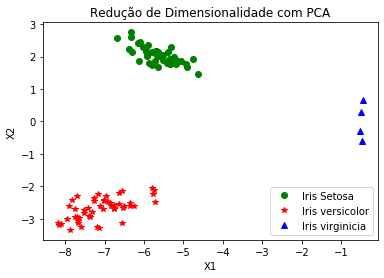

In [7]:
# plot the data points
p1 = plot(low_dim_setosa_points[:,0].tolist(),low_dim_setosa_points[:,1].tolist(),"ro", label="Iris Setosa", color='green')
p2 = plot(low_dim_versicolor_points[:,0].tolist(),low_dim_versicolor_points[:,1].tolist(),"r*",label="Iris versicolor", color='red')
p3 = plot(virginicia_pc_projection_matrix[:,0].tolist(),virginicia_pc_projection_matrix[:,1].tolist(),"r^",label="Iris virginicia", color='blue')

title("Redução de Dimensionalidade com PCA")
xlabel("X1")
ylabel("X2") 
legend(loc = "lower right")
show()
